In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from scipy.signal import savgol_filter
import seaborn as sns
import ast
sns.set()

# Episodes: Loss, Mean Reward, etc.

In [17]:
!ls ../../training/a2c_tfm/info

dist.txt  episodes.csv	info.txt  train_arrays.txt


In [22]:
path = "../../training/a2c_tfm/"
df_4 = pd.read_csv(path+'info/episodes.csv',
                   delimiter=";",
                   names=["episodes", "env_time", "length", "reward", "mean_reward",
                          "total_loss", "actor_loss", "critic_loss", "entropy_term"])
df_4

,episodes,env_time,length,reward,mean_reward,total_loss,actor_loss,critic_loss,entropy_term
0,0,100.846021,7116,-1.240023e+07,-1742.583800,0.469991,-0.036721,0.507803,-0.001091
1,1,87.172071,6961,-1.184447e+07,-1701.547419,0.542706,0.036778,0.506987,-0.001059
2,2,89.098028,6874,-1.201465e+07,-1747.839520,0.573203,0.064203,0.510024,-0.001024
3,3,91.810062,6905,-1.212852e+07,-1756.484404,0.589165,0.076190,0.513990,-0.001015
4,4,92.905164,7295,-1.263372e+07,-1731.832794,0.586366,0.077530,0.509842,-0.001006
5,5,89.616288,6925,-1.162991e+07,-1679.409630,0.606127,0.097520,0.509588,-0.000982
6,6,91.693086,7231,-1.231865e+07,-1703.588296,0.674790,0.160925,0.514811,-0.000946
7,7,92.501531,7152,-1.181634e+07,-1652.172685,0.668497,0.160158,0.509267,-0.000927
8,8,92.016246,7167,-1.172890e+07,-1636.513933,0.670848,0.154443,0.517303,-0.000898
9,9,94.572670,7187,-1.123134e+07,-1562.729860,0.637533,0.114696,0.523684,-0.000848


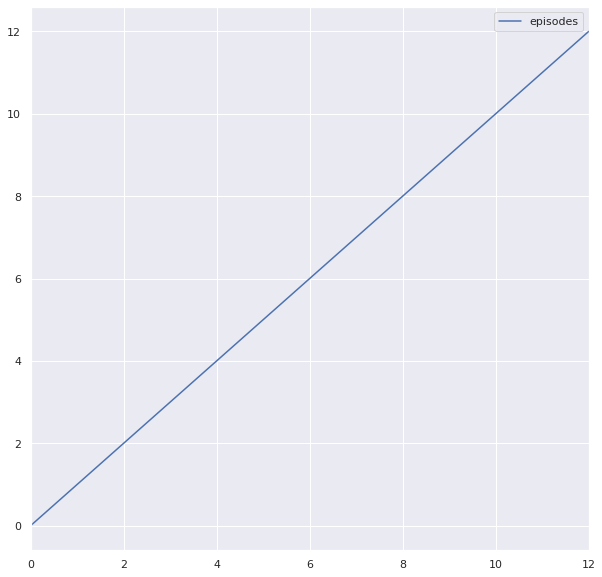

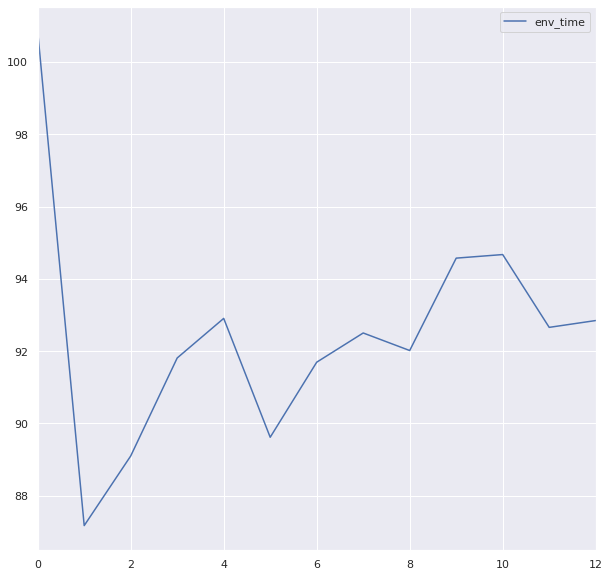

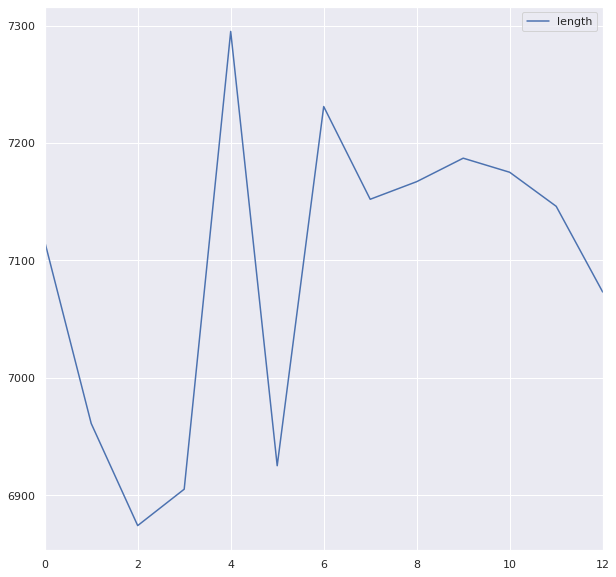

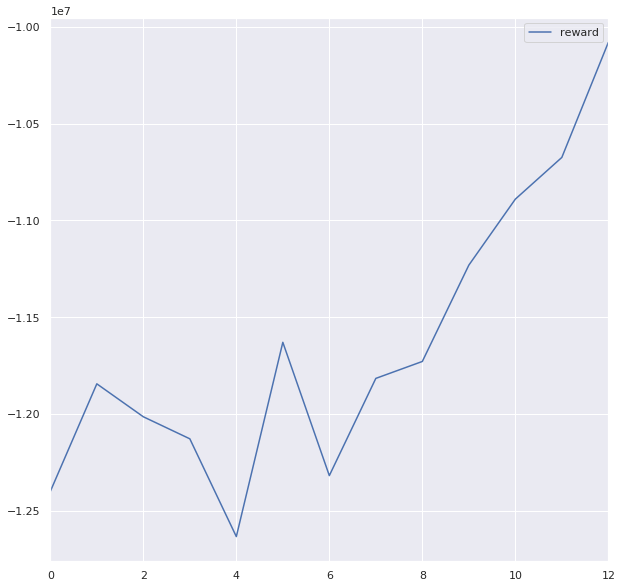

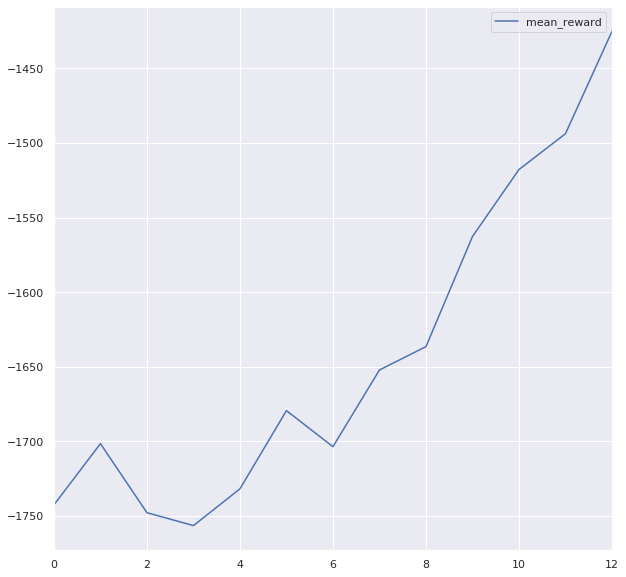

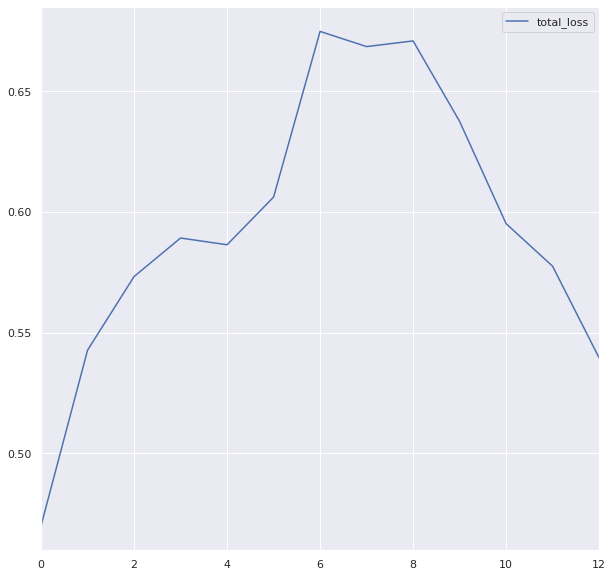

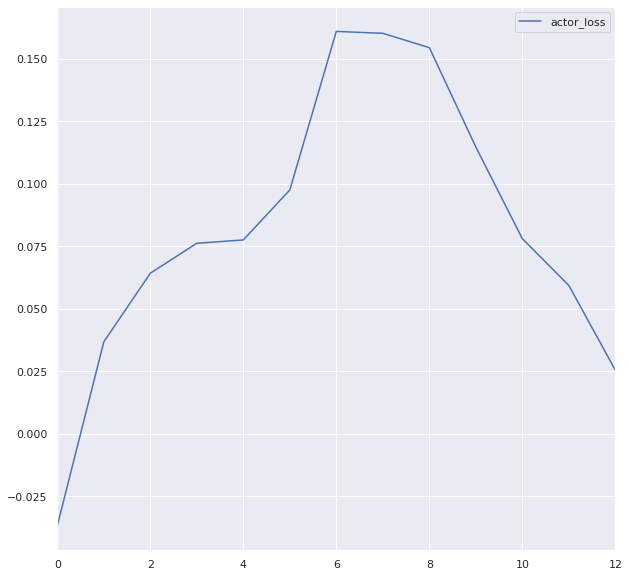

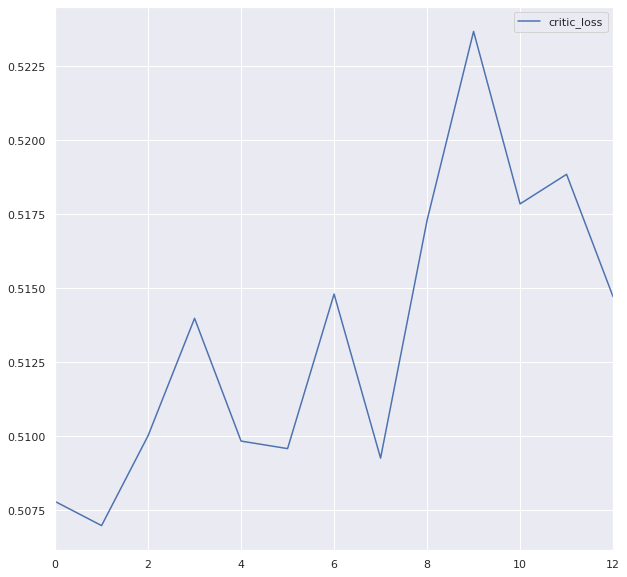

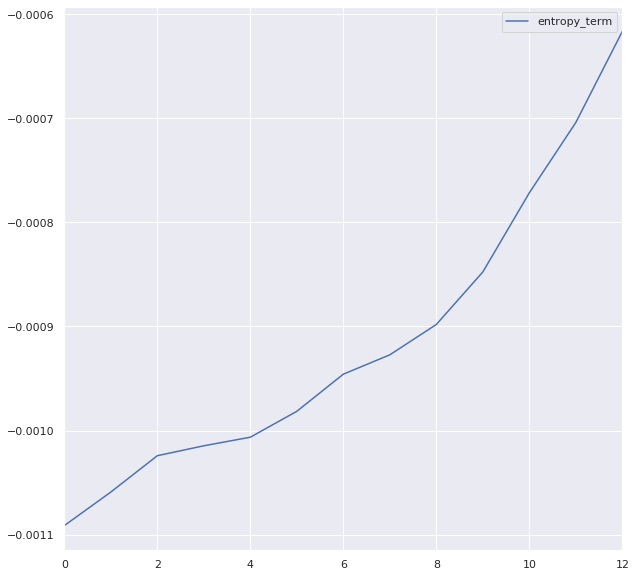

In [19]:
for col in df_4.columns:
    df_4.plot(y=col, figsize=(10,10))

# Trajectories (obs, actions, penalty)

In [4]:
COLUMN_NAMES = ["util_0", "power_0", "it_0", "cool_0",
                "util_1", "power_1", "it_1", "cool_1",
                "util_2", "power_2", "it_2", "cool_2",
                "action", "penalty"]
df = pd.read_csv(path+'current_trajectories/n_1.csv',
                 delimiter=";",
                 names=COLUMN_NAMES,)
df

,util_0,power_0,it_0,cool_0,util_1,power_1,it_1,cool_1,util_2,power_2,it_2,cool_2,action,penalty
0,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-4.739408,-5.148372,-4.739408,edc_2,False
1,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-4.739408,-5.148372,-4.739408,edc_0,False
2,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,0.109685,-0.091407,-4.947280,edc_0,False
3,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-5.148372,-5.148372,-5.148372,-1.489666,0.513444,0.309819,-4.944748,edc_0,False
4,-2.949946,-5.148372,-5.148372,-5.148372,-2.949946,-5.148372,-5.148372,-5.148372,-0.029385,1.015567,0.806144,-4.938949,edc_1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-1.265007,-2.032890,-2.775733,-4.405530,-1.377336,-2.051354,-2.789794,-4.409932,-0.928019,-2.046196,-2.263899,-4.930670,edc_1,False
1131,-1.265007,-2.032890,-2.775733,-4.405530,-1.377336,-2.051354,-2.789794,-4.409932,-0.928019,-2.046196,-2.263899,-4.930670,edc_0,False
1132,-1.265007,-2.032890,-2.775733,-4.405530,-1.265007,-2.032890,-2.775733,-4.405530,-0.928019,-2.046196,-2.263899,-4.930670,edc_1,False
1133,-1.265007,-2.032890,-2.775733,-4.405530,-1.265007,-2.032890,-2.775733,-4.405530,-0.928019,-2.046196,-2.263899,-4.930670,edc_1,False


In [5]:
df.action.value_counts()

edc_0    428
edc_2    369
edc_1    338
Name: action, dtype: int64

In [6]:
df.penalty.value_counts()

False    1135
Name: penalty, dtype: int64

In [7]:
scale_dict = {"power": (944.16, 183.39),
              "util": (656.54, 222.56),
              "dist": (1088.39, 540.25)}


def inverse_scale_data(scale_data):
    return scale_data * scale_pair[1] + scale_pair[0]
        
scaled_col = COLUMN_NAMES[:-2]

scaled_df = df.copy()
scale_pair = scale_dict["util"]
scaled_df[scaled_col[0::4]] = scaled_df[scaled_col[0::4]].apply(inverse_scale_data)

scale_pair = scale_dict["power"]
scaled_df[scaled_col[1::4]] = scaled_df[scaled_col[1::4]].apply(inverse_scale_data)

scale_pair = scale_dict["power"]
scaled_df[scaled_col[2::4]] = scaled_df[scaled_col[2::4]].apply(inverse_scale_data)

scale_pair = scale_dict["power"]
scaled_df[scaled_col[3::4]] = scaled_df[scaled_col[3::4]].apply(inverse_scale_data)

for i in range(3):
    scaled_df["pue_"+str(i)] = scaled_df["power_"+str(i)] / scaled_df["it_"+str(i)]

scaled_df = scaled_df[~scaled_df.isin([np.nan, np.inf, -np.inf]).any(1)]

scaled_df["total_power"] = scaled_df["power_0"] + scaled_df["power_1"] + scaled_df["power_2"]
scaled_df["total_it"] = scaled_df["it_0"] + scaled_df["it_1"] + scaled_df["it_2"]
scaled_df["total_cool"] = scaled_df["cool_0"] + scaled_df["cool_1"] + scaled_df["cool_2"]
scaled_df["total_util"] = scaled_df["util_0"] + scaled_df["util_1"] + scaled_df["util_2"]

scaled_df["total_pue"] = scaled_df["total_power"].iloc[10:]  / scaled_df["total_it"].iloc[10:]

scaled_df = scaled_df[~scaled_df.isin([np.nan, np.inf, -np.inf]).any(1)]

scaled_df.describe()

,util_0,power_0,it_0,cool_0,util_1,power_1,it_1,cool_1,util_2,power_2,it_2,cool_2,pue_0,pue_1,pue_2,total_power,total_it,total_cool,total_util,total_pue
count,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1.125000e+03,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,3.767778e+02,7.151013e+02,5.445955e+02,1.705058e+02,2.811556e+02,5.111314e+02,3.892593e+02,1.218720e+02,3.421778e+02,451.925451,4.057828e+02,46.142622,1.309469,1.304738,1.303498e+06,1678.158132,1339.637666,338.520467,1000.111112,1.253584
std,1.328879e+02,1.754584e+02,1.336228e+02,4.183556e+01,1.051044e+02,1.463307e+02,1.114402e+02,3.489049e+01,1.363647e+02,129.525913,1.365523e+02,8.382786,0.033476,0.050463,1.255914e+07,185.451487,149.521053,55.756913,234.657055,0.042511
min,3.516609e-07,6.137338e-07,6.137338e-07,6.137338e-07,3.516609e-07,6.137338e-07,6.137338e-07,6.137338e-07,3.516609e-07,75.000001,6.137338e-07,36.740977,1.000000,1.000000,1.033994e+00,538.670758,353.115022,36.740978,0.000001,1.033994
25%,3.000000e+02,5.731142e+02,4.364632e+02,1.366510e+02,2.250000e+02,4.280697e+02,3.260025e+02,1.020672e+02,2.750000e+02,401.574520,3.551504e+02,40.133774,1.313087,1.313087,1.077171e+00,1628.170002,1288.462258,312.211641,900.000001,1.226231
50%,3.750000e+02,6.956799e+02,5.298048e+02,1.658750e+02,3.000000e+02,5.439874e+02,4.142813e+02,1.297061e+02,3.750000e+02,420.323696,3.749871e+02,45.336636,1.313087,1.313087,1.120902e+00,1704.678701,1359.354333,338.758466,1050.000000,1.258242
75%,4.250000e+02,8.389584e+02,6.389206e+02,2.000378e+02,3.500000e+02,5.713483e+02,4.351183e+02,1.362299e+02,4.250000e+02,560.195823,5.200621e+02,46.424114,1.313087,1.313087,1.130717e+00,1799.811333,1434.129250,376.510596,1150.000000,1.265197
max,7.000000e+02,1.051472e+03,8.007632e+02,2.507086e+02,5.000000e+02,7.163928e+02,5.455790e+02,1.708137e+02,1.250000e+03,1250.058341,1.208961e+03,75.000001,1.313087,1.313087,1.222028e+08,1893.209787,1516.353928,458.253272,1250.000000,1.525482


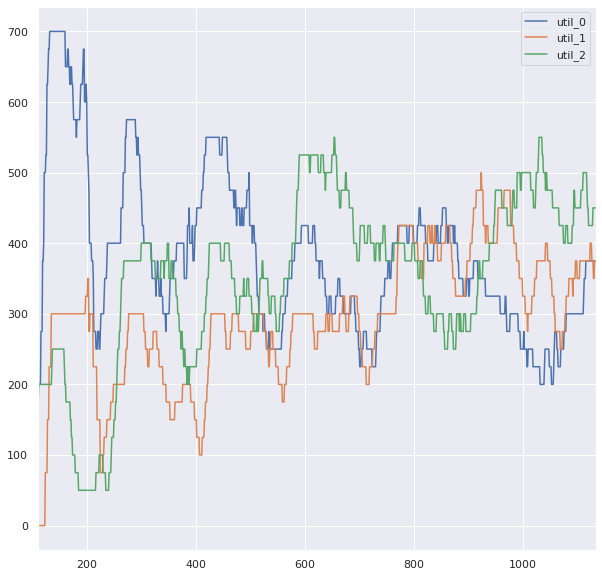

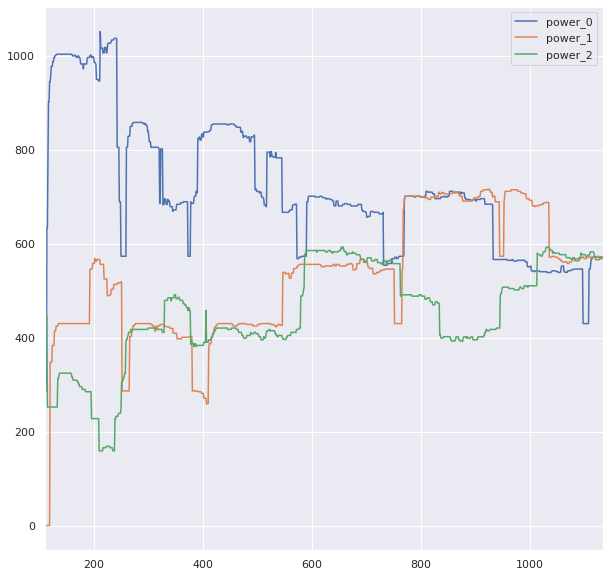

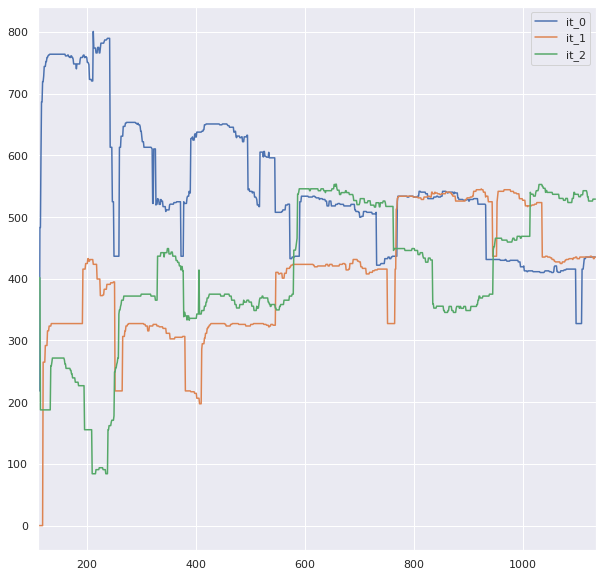

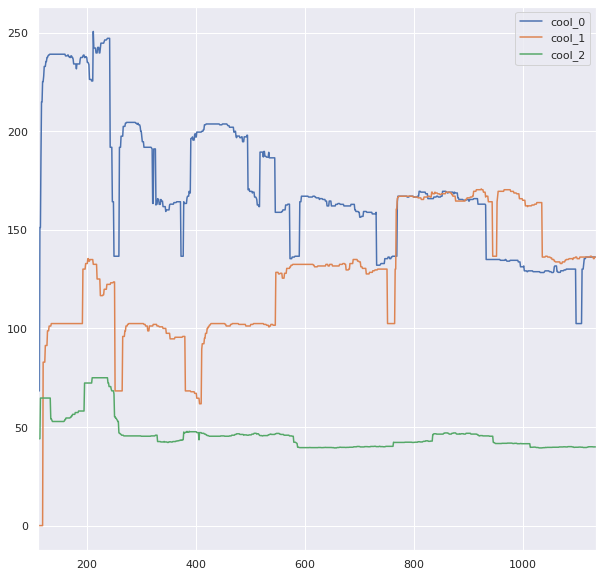

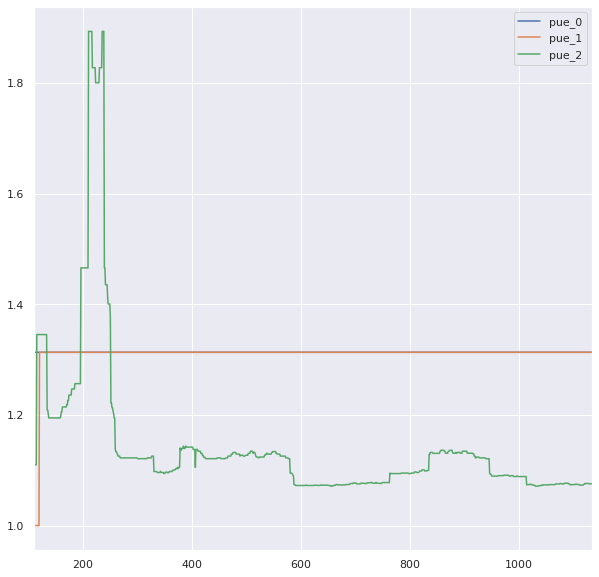

In [8]:
# EDC COMPARISON
for col in ["util", "power", "it", "cool","pue"]:
    scaled_df.iloc[100:].plot(y=[col+"_0", col+"_1", col+"_2"], figsize=(10,10))

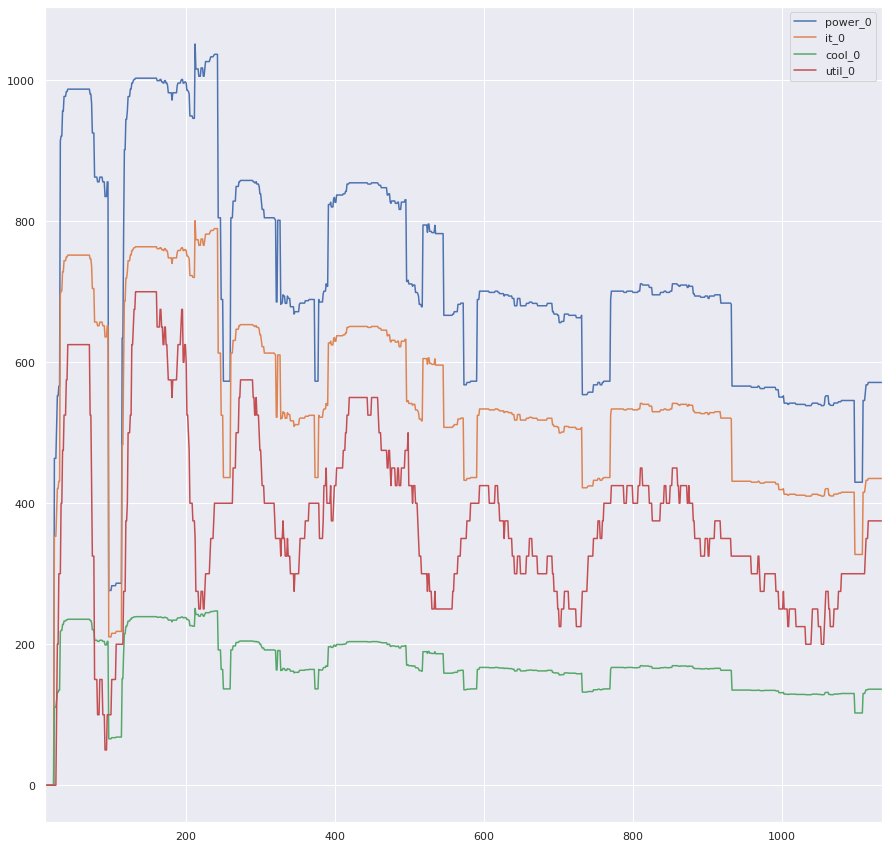

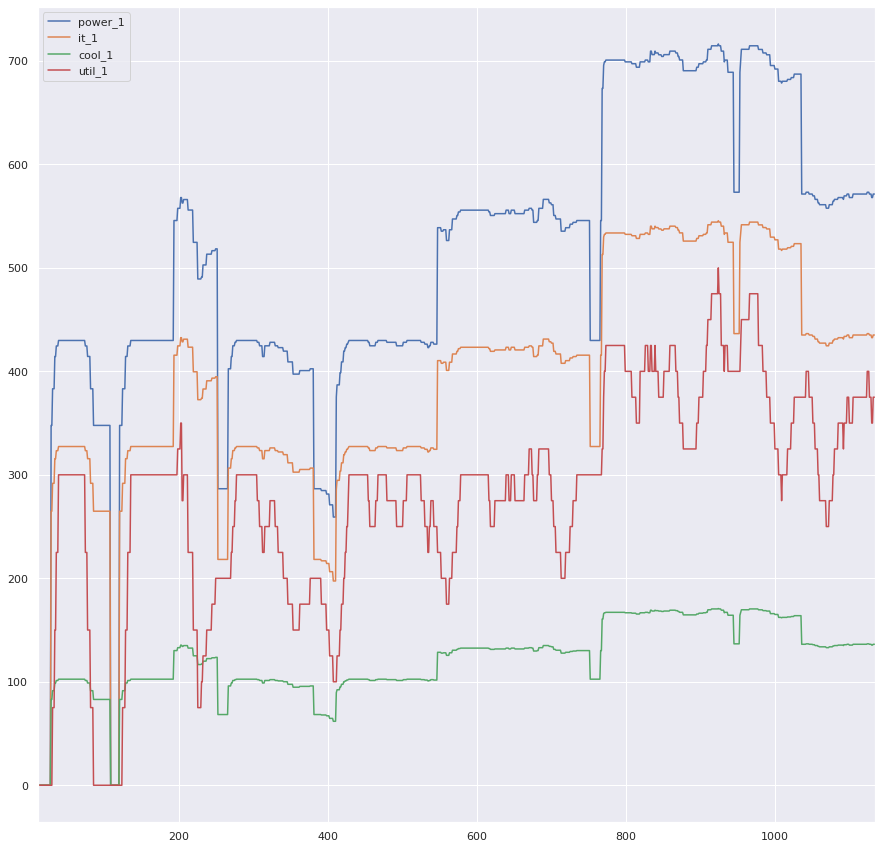

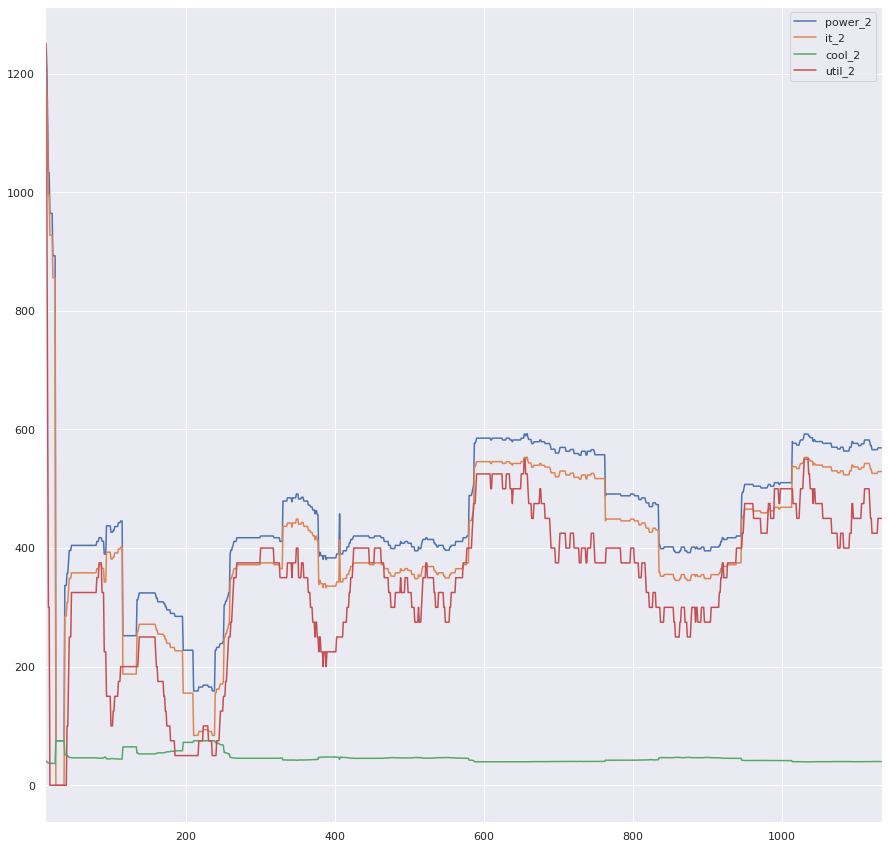

In [9]:
# METRICS per EDC 
for i in range(3):
    scaled_df.plot(y=["power_"+str(i),"it_"+str(i),"cool_"+str(i),"util_"+str(i)], figsize=(15,15))

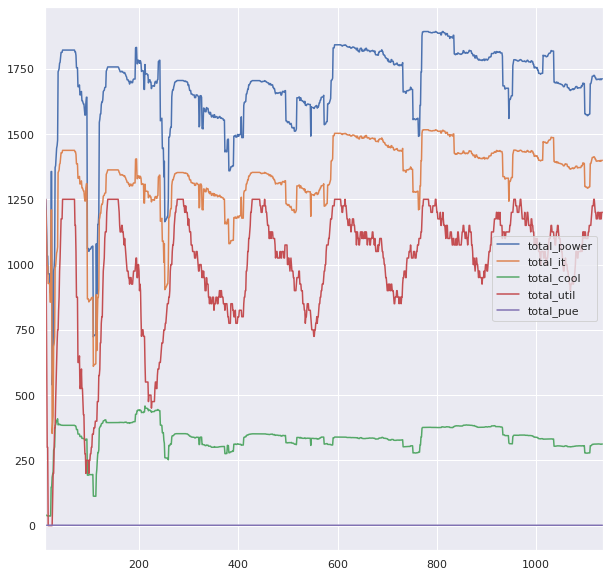

In [10]:
# SCENARIO METRICS
scaled_df.plot(y=[col for col in scaled_df.columns if "total" in col], figsize=(10,10))
plt.show()

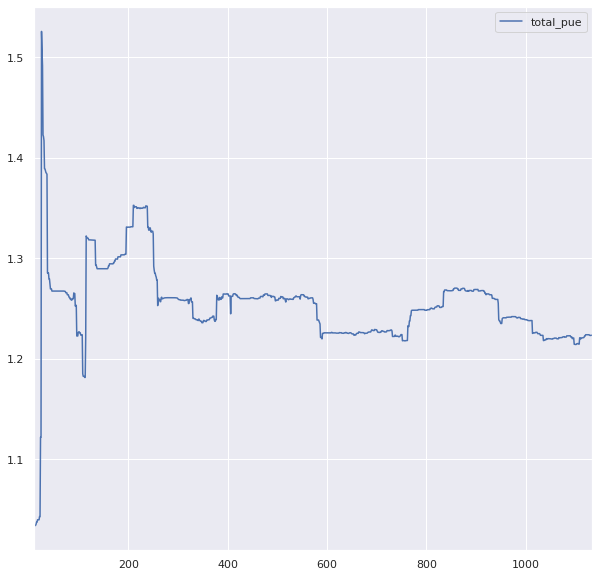

In [11]:
# SCENARIO PUE
scaled_df.plot(y="total_pue", figsize=(10,10))
plt.show()


# REWARD, Q-VALUES, ETC. INFO

In [12]:
df_2 = pd.read_csv(path+'info/train_arrays.txt',
                   delimiter=",",
                   names=["log_prob", "_", "reward", "v_vals",
                          "q_vals", "entropy"])
df_2 = df_2.drop(["_"], axis=1)
df_2["log_prob"] = df_2["log_prob"].apply(lambda x: x.split("(")[1])
df_2["log_prob"] = df_2["log_prob"].astype("float64")



df_2["a_vals"] = df_2.q_vals - df_2.v_vals

for col in df_2.columns:
    plt.figure(figsize=(10,10))
    plt.plot(df_2[col])
    plt.plot(pd.Series.rolling(pd.Series(df_2[col]), 10000).mean())
    plt.ylabel(col)
    plt.show()

FileNotFoundError: [Errno 2] File b'../../training/a2c_tfm/info/train_arrays.txt' does not exist: b'../../training/a2c_tfm/info/train_arrays.txt'

In [ ]:
"""
GAMMA = 0.0
rew = df_2.reward.iloc[:2350].values
#rew = (rew - np.mean(rew)) / (np.std(rew) + 0.00000000000000000001)
q_val = rew[-1]
q_vals = np.zeros_like(rew)

for i in reversed(range(len(rew))):
    q_val_temp = q_val
    q_val = rew[i] + GAMMA * q_val
    q_vals[i] = q_val
#q_vals = (q_vals - np.mean(q_vals)) / (np.std(q_vals) + 0.00000000000000000001)

plt.figure(figsize=(10,10))
plt.plot(q_vals, linewidth=2)
plt.ylabel("Reward", fontsize=30)
plt.xlabel('Timestep', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.legend(fontsize=25)
plt.show()
"""
print()

# DISTRIBUTION INFO

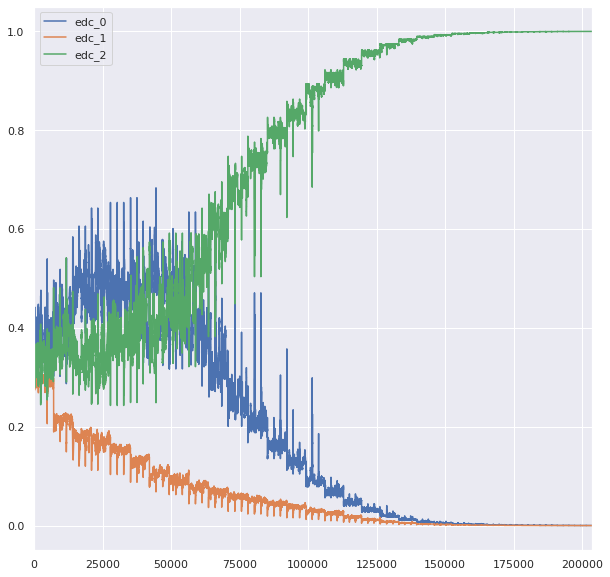

In [23]:
df_3 = pd.read_csv(path+'info/dist.txt', delimiter=",", names=["dist"])

df_3["edc_0"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[0][1:])
df_3["edc_1"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[1])
df_3["edc_2"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[2][:-1])

df_3.edc_0 = df_3.edc_0.astype("float64")
df_3.edc_1 = df_3.edc_1.astype("float64")
df_3.edc_2 = df_3.edc_2.astype("float64")

df_3 = df_3.drop(["dist"], axis=1)

df_3.iloc[:].plot(y=["edc_0","edc_1","edc_2"], figsize=(10,10))

# EXTRA


# REWARD COMPUTATION

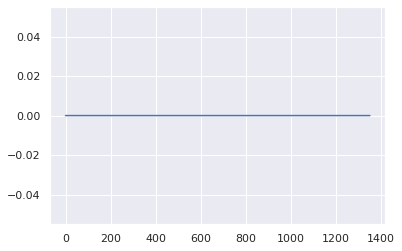

(1351, 12)


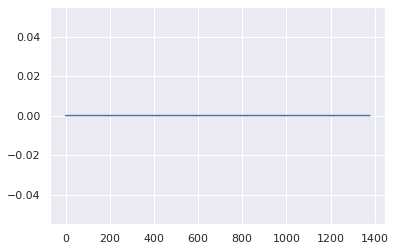

(1379, 12)


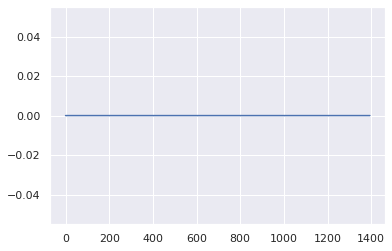

(1395, 12)
3 1378


In [13]:
EPSILON = np.finfo(np.float32).eps
AVAILABILITY_PENALTY = 0

rewards = []
#directory = "../results/vanilla_a3c_v2_lite_env_6_UE_50_GPUperEDC_10_standarize_data&Qvalues_reward_sumrealPOP1P2adam_1e3_ep_30_penalty_1_neurons_128/a3c/"
#directory = "../data/a3c/"
directory = path + "current_trajectories/"


for filename in sorted(os.listdir(directory)):
    
    tmp_cols = COLUMN_NAMES
    
    df_tmp = pd.read_csv(os.path.join(directory, filename), delimiter=";", names=tmp_cols).iloc[6:]
    
    
    x = df_tmp[COLUMN_NAMES[:-2]].values
    penalty = df_tmp["penalty"].values
    
    
    scale_pair = scale_dict["util"]
    x[:,0::4] = inverse_scale_data(x[:, 0::4])

    scale_pair = scale_dict["power"]
    x[:,1::4] = inverse_scale_data(x[:, 1::4])
    
    """
    offset = inverse_scale_data(offset)
    offset = np.sum(np.mean(x[:, 1::5], axis=0))/x[:, 1::5].shape[1]
    print(offset)
    """

    plt.plot(penalty)
    plt.show()
    
    
    ep_rewards = []
    print(x.shape)
    
    for i in range(len(x)-1):
        
        power_consumption = x[i+1, 1::4] # total power
        total_power = np.power(np.sum(power_consumption), 1)
        pen = penalty[i]
        if total_power > 0:
            reward = - (1 + AVAILABILITY_PENALTY * pen) * total_power
        else:
            reward = - (1 - AVAILABILITY_PENALTY * pen) * total_power
        
        ep_rewards.append(reward)
    rewards.append(ep_rewards)

print(len(rewards), len(rewards[1]))

In [86]:
df_tmp.columns[:-2]

Index(['util_0', 'power_0', 'it_0', 'cool_0', 'util_1', 'power_1', 'it_1',
       'cool_1', 'util_2', 'power_2', 'it_2', 'cool_2'],
      dtype='object')

mean reward 0: -1660.4776051054885
mean reward 1: -1731.450381749885
mean reward 2: -1688.0607416907417


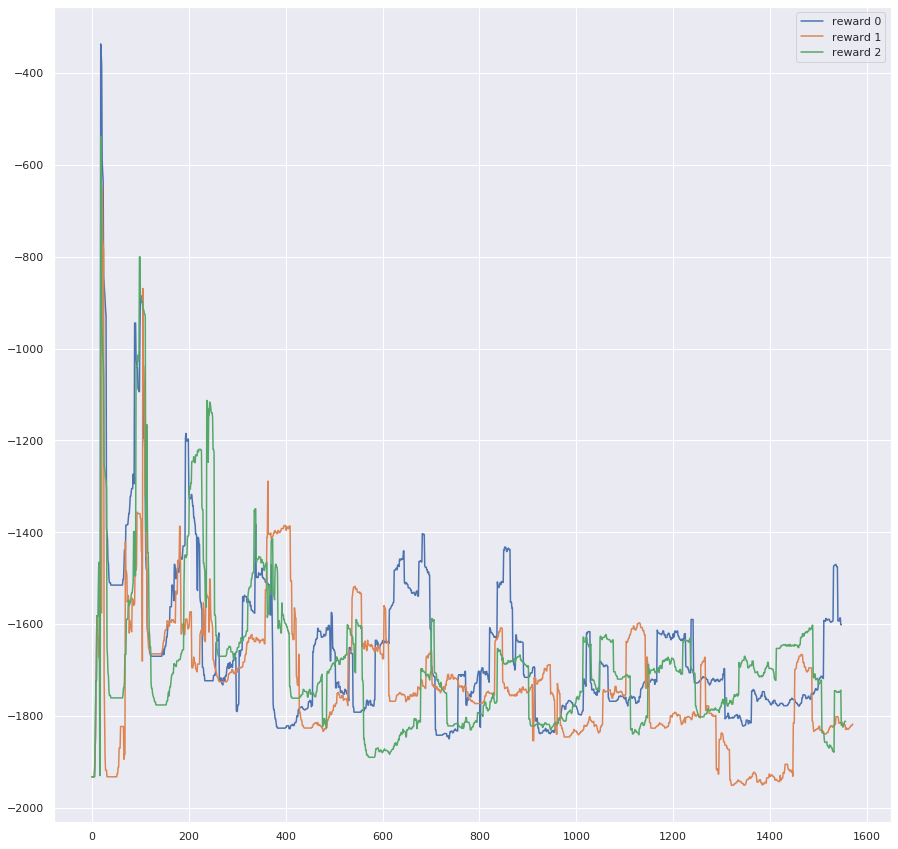

In [87]:
plt.figure(figsize=(15,15))
for i in range(len(rewards)):
    print("mean reward {}: {}".format(i, sum(rewards[i])/len(rewards[i])))
    plt.plot(rewards[i][:])
plt.legend(["reward "+str(i) for i in range(len(rewards))])
plt.show()